In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc


In [191]:
train_df = pd.read_parquet("train_full-00000-of-00001.parquet")
test_df = pd.read_parquet("test-00000-of-00001.parquet")


In [193]:
label_map = {
    0: "World",
    1: "Sports",
    2: "Business",
    3: "Science and Technology"
}

In [195]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    96000 non-null  object
 1   label   96000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7600 non-null   object
 1   label   7600 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.9+ KB


In [197]:
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (96000, 2)
Test shape: (7600, 2)


In [199]:
train_df.isnull().sum()

text     0
label    0
dtype: int64

In [201]:
train_df.describe()

,label
count,96000.00000
mean,1.50000
std,1.11804
min,0.00000
25%,0.75000
50%,1.50000
75%,2.25000
max,3.00000


In [203]:
unique_class= train_df['label'].unique()
unique_class_names = [label_map[i] for i in label_map]

print(unique_class_names)

['World', 'Sports', 'Business', 'Science and Technology']


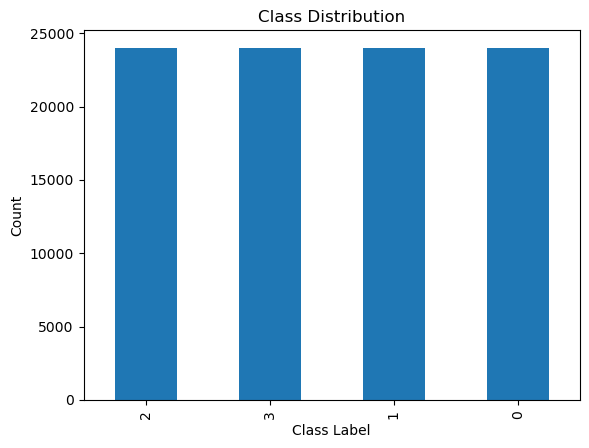

In [205]:
train_df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


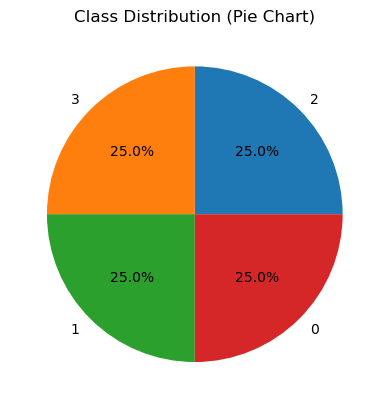

In [207]:
train_df['label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Class Distribution (Pie Chart)")
plt.ylabel("")
plt.show()


In [209]:
X = train_df['text']       
y = train_df['label']      

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [211]:
vectorizer = TfidfVectorizer(max_features=5000) 

X_train_tfidf = vectorizer.fit_transform(X_train)  
X_test_tfidf = vectorizer.transform(X_test)        



In [212]:
TfidfVectorizer(max_features=5000, stop_words='english')

TfidfVectorizer(max_features=5000, stop_words='english')

In [213]:
lr_model = LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [214]:
y_pred1 = lr_model.predict(X_test_tfidf)


In [215]:
sample_news = ["Apple releases new iPhone with advanced features"]
sample_vector = vectorizer.transform(sample_news)

pred_label = lr_model.predict(sample_vector)[0]
pred_class = label_map[pred_label]

print("Predicted Category:", pred_class)


Predicted Category: Science and Technology


In [216]:
y_pred_classes = np.round(y_pred1).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.90640625
Confusion Matrix:
 [[4303  147  201  163]
 [  69 4684   29   38]
 [ 160   59 4185  407]
 [ 145   45  334 4231]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4814
           1       0.95      0.97      0.96      4820
           2       0.88      0.87      0.88      4811
           3       0.87      0.89      0.88      4755

    accuracy                           0.91     19200
   macro avg       0.91      0.91      0.91     19200
weighted avg       0.91      0.91      0.91     19200



In [217]:
lr_mae = mean_absolute_error(y_test, y_pred1)
lr_mse = mean_squared_error(y_test, y_pred1)
lr_r2 = r2_score(y_test, y_pred1)

print("Logistic Regression Results")
print("MAE:", lr_mae)
print("MSE:", lr_mse)
print("R2:", lr_r2)

Logistic Regression Results
MAE: 0.14880208333333333
MSE: 0.29130208333333335
R2: 0.7663503529173507


In [220]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [222]:
y_pred2 = rf_model.predict(X_test_tfidf)
sample_news = ["New football club wins the tournament"]
sample_vector = vectorizer.transform(sample_news)
pred_label = rf_model.predict(sample_vector)[0]
pred_class = label_map[pred_label]
print("Predicted Category:", pred_class)


Predicted Category: Sports


In [223]:
y_pred_classes = np.round(y_pred2).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.8678645833333334
Confusion Matrix:
 [[4158  241  204  211]
 [  81 4613   47   79]
 [ 210  149 3954  498]
 [ 228  163  426 3938]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88      4814
           1       0.89      0.96      0.92      4820
           2       0.85      0.82      0.84      4811
           3       0.83      0.83      0.83      4755

    accuracy                           0.87     19200
   macro avg       0.87      0.87      0.87     19200
weighted avg       0.87      0.87      0.87     19200



In [224]:
rf_mae = mean_absolute_error(y_test, y_pred2)
rf_mse = mean_squared_error(y_test, y_pred2)
rf_r2 = r2_score(y_test, y_pred2)

print("Random Forest Results")
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("R2:", rf_r2)

Random Forest Results
MAE: 0.21203125
MSE: 0.4175520833333333
R2: 0.6650868548790274


In [231]:
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

LinearSVC()

In [232]:
y_pred3 = svm_model.predict(X_test_tfidf)
sample_news = ["New research found that satellites were not found"]
sample_vector = vectorizer.transform(sample_news)
pred_label = svm_model.predict(sample_vector)[0]
pred_class = label_map[pred_label]
print("Predicted Category:", pred_class)


Predicted Category: Science and Technology


In [233]:
svm_mae = mean_absolute_error(y_test, y_pred3)
svm_mse = mean_squared_error(y_test, y_pred3)
svm_r2 = r2_score(y_test, y_pred3)

print("Support Vector Machine Results")
print("MAE:", svm_mae)
print("MSE:", svm_mse)
print("R2:", svm_r2)

Support Vector Machine Results
MAE: 0.14848958333333334
MSE: 0.28984375
R2: 0.7675200632907306


In [234]:
y_pred_classes = np.round(y_pred3).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print(classification_report(y_test, y_pred_classes))


Accuracy: 0.90625
Confusion Matrix:
 [[4299  150  208  157]
 [  70 4678   36   36]
 [ 146   62 4194  409]
 [ 149   49  328 4229]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      4814
           1       0.95      0.97      0.96      4820
           2       0.88      0.87      0.88      4811
           3       0.88      0.89      0.88      4755

    accuracy                           0.91     19200
   macro avg       0.91      0.91      0.91     19200
weighted avg       0.91      0.91      0.91     19200



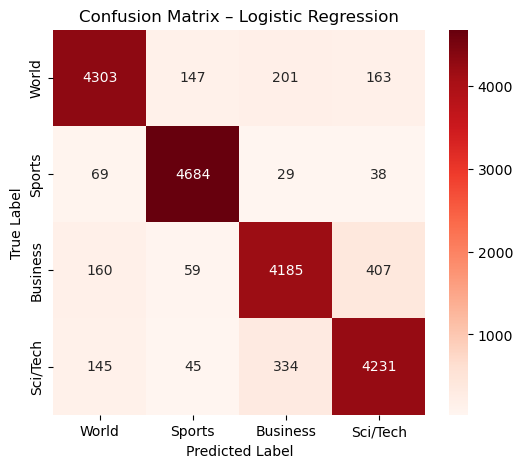

In [235]:
cm_lr = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_lr,
    annot=True,
    fmt="d",
    cmap="Reds",
    xticklabels=["World", "Sports", "Business", "Sci/Tech"],
    yticklabels=["World", "Sports", "Business", "Sci/Tech"]
)

plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


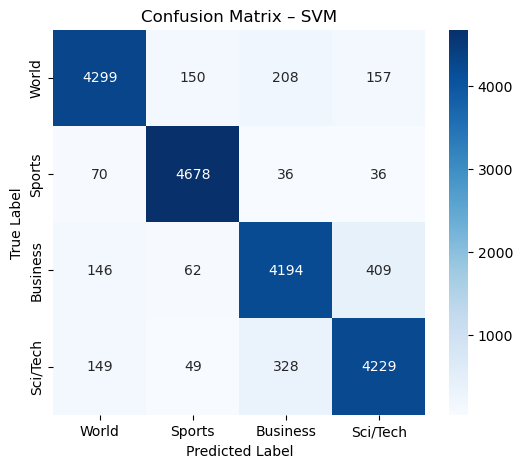

In [236]:
cm_svm = confusion_matrix(y_test, y_pred3)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_svm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["World", "Sports", "Business", "Sci/Tech"],
    yticklabels=["World", "Sports", "Business", "Sci/Tech"]
)

plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


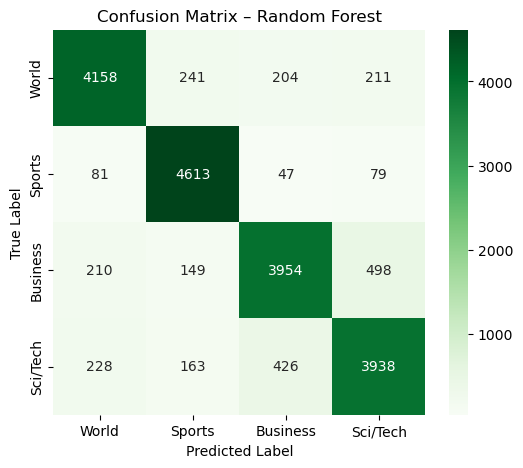

In [239]:
cm_rf = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=["World", "Sports", "Business", "Sci/Tech"],
    yticklabels=["World", "Sports", "Business", "Sci/Tech"]
)

plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


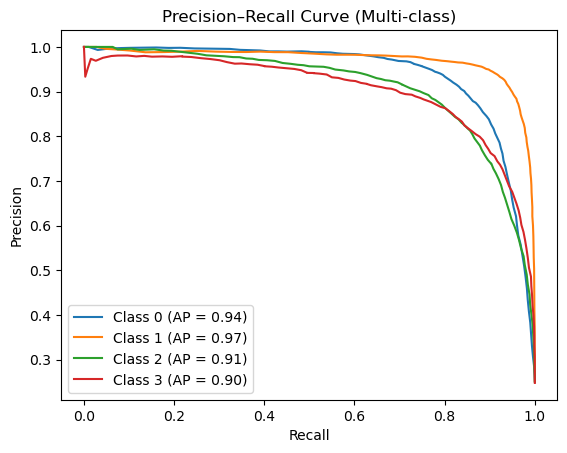

In [259]:


plt.figure()

for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(
        y_test_bin[:, i],
        y_score[:, i]
    )
    ap_score = average_precision_score(
        y_test_bin[:, i],
        y_score[:, i]
    )
    plt.plot(recall, precision, label=f"Class {i} (AP = {ap_score:.2f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve (Multi-class)")
plt.legend()
plt.show()
